In [1]:
import numpy as np
from scipy.stats import norm
from scipy import optimize
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from math import *
import pandas as pd
from scipy.optimize import curve_fit,leastsq
import statistics
from scipy import interpolate
# import lmfit
# from lmfit.lineshapes import gaussian2d, lorentzian

<h1>Define<h1>

In [2]:
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return np.abs(popt)

In [198]:
def MOT_sim(initial_size, temp, order, sigma_raw):
    mu = 0
    sigma_velocity = np.sqrt((k/rubidium_mass)*(temp))
    velocity=np.random.normal(mu,sigma_velocity,10000)
    x_not=np.random.normal(0,(initial_size),10000)
    time = np.arange(0,order+2,1)*1e-3
    data_column = [velocity]+[x_not+(velocity*time[i]) for i in range(order+1)]

    sigma_fit = []
    for j in range(2,order+2):
        mu, std = norm.fit(data_column[j])
        sigma_fit.append(std)

    return np.array(sigma_fit)

In [76]:
def MOT_gen (initial_size,Resolution_data,temp,sigma_raw):
    mu = 0
    sigma_velocity = np.sqrt((k/rubidium_mass)*(temp))
    sigma_fit = []
    velocity=np.random.normal(mu,sigma_velocity,10000)
    x_not=np.random.normal(0,(initial_size),10000)
    times = np.arange(0,point_of_time,1)*1e-3
    time = np.linspace(0,point_of_time,Resolution_data)*1e-3
    data_column = [x_not+(velocity*time[i]) for i in range(Resolution_data)]
    for j in range(0,Resolution_data):
        mu, std = norm.fit(data_column[j])
        sigma_fit.append(std)
    return np.array(sigma_fit),times,time

In [93]:
def Multi_MOT_gen(initial_size,Resolution_data,temp,sigma_raw):
    mu = 0
    n = sigma_raw.shape[0]
    x_not = np.random.normal(mu,initial_size,10000)
    times = np.arange(0,n,1)*1e-3
    time = np.linspace(0,n,Resolution_data)*1e-3
    std_fit = []
    for i in range(temp.shape[0]):
        sigma_velocity = np.sqrt((k/rubidium_mass)*(temp[i]))
        std_l = []
        velocity=np.random.normal(mu,sigma_velocity,10000)
        data_column = [x_not+(velocity*time[i]) for i in range(Resolution_data)]
        for j in range(0,Resolution_data):
            mu, std = norm.fit(data_column[j])
            std_l.append(std)
        std_fit.append(std_l)
    return np.array(std_fit),times,time

In [64]:
scale_factor = 2.535111137749588*(10**-5)
sigma_exp_pixel=np.array([22.674836507122023, 22.321439421782348, 24.233914721344025, 27.699338792540498, 30.85363464598624, 41.6176240234315])#, 55.86625225000703, 46.41098514258633, 137.04047126474313, 96.96425476925282])
sigma_err =scale_factor*np.array([0.54697102 ,0.50053797 ,0.64864047 ,0.83312344 ,1.44395329 ,3.30220595 ])#,8.47620527 ,7.22363419 ,165.29643617 ,49.07438558]
sigma_mot_fit = 23.090832364563013
sigma_exp = sigma_exp_pixel*(sigma_mot_fit / sigma_exp_pixel[0]) * scale_factor
rubidium_mass=1.409993e-25
k=1.380649e-23
mu = 0
ini_MOT_size = 0.0005853782630731235

<h1>Cloud atom simulation<h1>

In [256]:
def MOT_sim_his(initial_size, temp, order, sigma_raw):
    mu = 0
    sigma_velocity = np.sqrt((k/rubidium_mass)*(temp))
    velocity=np.random.normal(mu,sigma_velocity,10000)
    x_not=np.random.normal(0,(initial_size),10000)
    
    index_column = ['V'] + ['X'+str(k) for k in range(order+1)]
    time = np.arange(0,order+2,1)*1e-3
    data_column = [velocity]+[x_not+(velocity*time[i]) for i in range(order+1)]

    position = pd.DataFrame()
    position = pd.DataFrame({index_column[0]:data_column[0]})
    for j in range(1,order+2):
        position = position.join(pd.DataFrame({index_column[j]:data_column[j]}))

    return position, index_column

In [262]:
position_df ,index_column= MOT_sim_his(ini_MOT_size, 200, 6, sigma_exp)

4.563842602190563
1062.8448661306406


F:\ANACON\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


2125.479495509094
3188.114124887547
4250.748754266
5313.383383644453
6376.018013022906


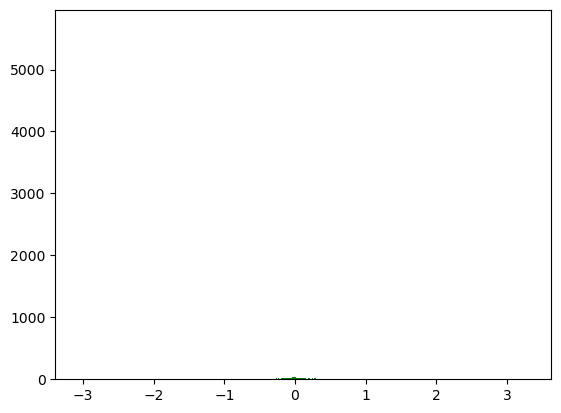

In [265]:
sigma_fit=[]
bins_fit=[]
n_fit=[]
for i in index_column[1:]:
    bins_n=abs(np.max(position_df[i])- np.min(position_df[i]))/0.001
    print(bins_n)
    n, bins, patches = plt.hist(position_df[i], bins=int(bins_n), facecolor='green', alpha=1)
    sigma_fit.append(gauss_fit((bins[:-1]+bins[1:])/2,n)[3])
    bins_fit.append((bins[:-1]+bins[1:])/2)
    n_fit.append(n)

In [ ]:
sigma_plot=[]
bins_plot=[]
n_plot=[]

for i in range(6):
    velocity=np.random.normal(mu,sigma_velocity[i],10000)
    x=np.random.normal(mu,sigma_sampling,10000)
    position_df=pd.DataFrame()
    position_df=pd.DataFrame({'V0':velocity, 'x0':x+(0*velocity*time_step), 'x1':x+(velocity*time_step), 
                          'x2':x+(2*velocity*time_step),'x3':x+(3*velocity*time_step),'x4':x+(4*velocity*time_step),
                         'x5':x+(5*velocity*time_step),'x6':x+(6*velocity*time_step),'x7':x+(7*velocity*time_step),
                         'x8':x+(8*velocity*time_step),'x9':x+(9*velocity*time_step)})
    sigma_fit=[]
    bins_fit=[]
    n_fit=[]
    for i in 'x0','x1','x2','x3','x4','x5','x6','x7','x8','x9':
        bins_n=abs(np.max(position_df[i])- np.min(position_df[i]))/0.00001
        print(bins_n)
        n, bins, patches = plt.hist(position_df[i], bins=int(bins_n), facecolor='green', alpha=1)
        sigma_fit.append(gauss_fit((bins[:-1]+bins[1:])/2,n)[3])
        bins_fit.append((bins[:-1]+bins[1:])/2)
        n_fit.append(n)
    sigma_plot.append(sigma_fit)
    bins_plot.append(bins_fit)
    n_plot.append(n_fit)

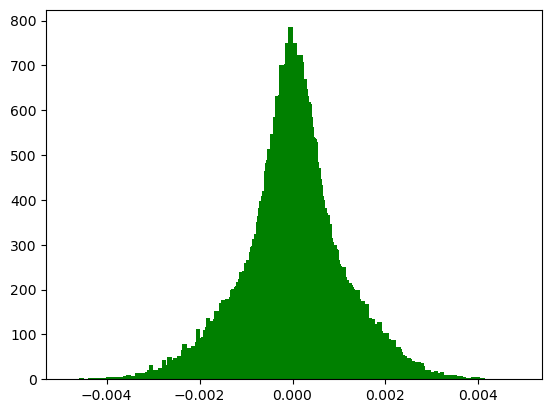

In [4]:
sigma_plot=[]
x_fit=[]
p_fit=[]
n_plot=[]
bins_plot=[]
position_plot=[]
for i in range(6):
    velocity=np.random.normal(mu,sigma_velocity[i],10000)
    x=np.random.normal(0,(b[0]+b[1]+b[1])/3,10000)
    position_df=pd.DataFrame()
    position_df=pd.DataFrame({'V':velocity, 'x0':x+(0*velocity*time_step), 'x1':x+(velocity*time_step), 
                          'x2':x+(2*velocity*time_step),'x3':x+(3*velocity*time_step),'x4':x+(4*velocity*time_step),
                         'x5':x+(5*velocity*time_step),'x6':x+(6*velocity*time_step),'x7':x+(7*velocity*time_step),
                         'x8':x+(8*velocity*time_step),'x9':x+(9*velocity*time_step)})
    position_plot.append(np.transpose(position_df.to_numpy()))
    sigma_fit=[]
    
    for i in 'x0','x1','x2','x3','x4','x5','x6','x7','x8','x9':
        mu, std = norm.fit(position_df[i])
        xmin, xmax = np.min(position_df[i]), np.max(position_df[i])
        bins_n=int((xmax - xmin)/0.0001)
        n, bins, patches = plt.hist(position_df[i], bins=bins_n, facecolor='green')
        n_plot.append(n)
        bins_plot.append(bins)
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        sigma_fit.append(std)
        x_fit.append(x)
        p_fit.append(p)
    sigma_plot.append(sigma_fit)
 

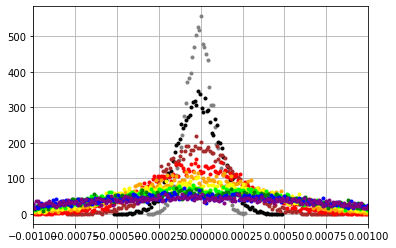

In [66]:
color=['grey','black','brown','red','orange','yellow','lime','green','blue','purple']
for i in range(0,10):
    x_axis=bins_plot[0][i]
    y_plot=n_plot[0][i]
    plt.plot(x_axis,y_plot,'.',color=color[i])
plt.xlim(-0.001,0.001)
plt.grid(True)
plt.show()

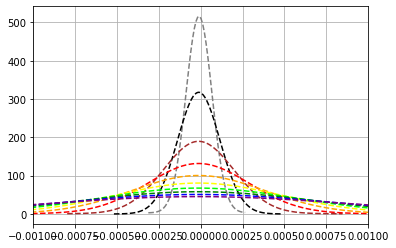

In [64]:
color=['grey','black','brown','red','orange','yellow','lime','green','blue','purple']
for i in range(0,10):
    x_axis=bins_plot[0][i]
    y_fit=gauss(bins_plot[0][i], *gauss_fit(bins_plot[0][i], n_plot[0][i]))
    plt.plot(x_axis, y_fit,'--k',color=color[i])
plt.xlim(-0.001,0.001)
plt.grid(True)
plt.show()

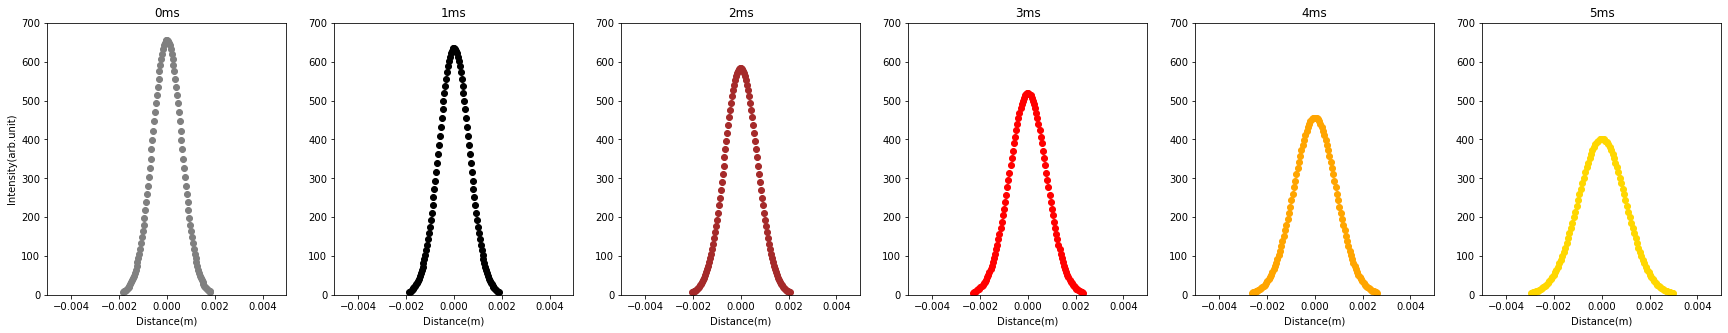

In [58]:
fig,(axs)=plt.subplots(1,point_of_time,figsize=(30,5))
k=0
clr=['grey','black','brown','red','orange','gold','green','blue','purple','magenta']
for p in range(point_of_time):
    axs[p].plot(np.linspace(mu - 3*sigma_sim_plot[k], mu + 3*sigma_sim_plot[k], 100),MOT_plot[k],'o',color=clr[k])
    axs[p].set_xlim([-0.005, 0.005])
    axs[p].set_ylim([0, 700])
    k+=1
    axs[p].set_xlabel('Distance(m)')
    axs[p].set_title(str(p)+'ms')
y_label = axs[0].set_ylabel('Intensity(arb.unit)')

<h2>LSW<h2>

In [200]:
def lsq_weight(n,temp_range_min,temp_range_max,sigma_raw_array,sigma_raw_err):
    
    min_lsq = np.inf
    max_lsq = -np.inf
    lsq_list = []
    x_list = []
    y_list = []
    temp_range = np.linspace(temp_range_min,temp_range_max,n)
    n_of_time = len(sigma_raw_array)
    for i in range(n):
        sigma_sim = MOT_sim(ini_MOT_size,temp_range[i],n_of_time,sigma_raw_array)
        y_distance_weight = [((1/(sigma_raw_err[h]**2))*((sigma_raw_array[h]-sigma_sim[h])**2)) for h in range(n_of_time)]
        lsq = np.sum(y_distance_weight)
        std_of_mean = np.sqrt(lsq)/np.sqrt(n_of_time-1)
        
        if(lsq < min_lsq):
            min_lsq = lsq
            real_temp = temp_range[i]
            Percent_err = std_of_mean
        if(lsq > max_lsq):
            max_lsq = lsq
        lsq_list.append(lsq)
    coef = np.polyfit(temp_range,lsq_list,4)
    poly1d = np.poly1d(coef)
    min_n = np.where(poly1d(temp_range) == np.min(poly1d(temp_range)))
    temp_mean = temp_range[min_n][0]
    
    min_x = np.where(poly1d(temp_range) <= poly1d(temp_mean) + Percent_err**2)
    temp_min, temp_max = temp_range[np.min(min_x)], temp_range[np.max(min_x)]
    return lsq_list , temp_range, poly1d(temp_range), temp_min, temp_max, temp_mean, min_x, poly1d(temp_mean)+Percent_err**2

In [204]:
lsq_data_weight, temp_ranges_weight, lsq_fit_weight, MOT_temp_min, MOT_temp_max, MOT_temp_mean, temp_range_linear, err= lsq_weight(200,0e-6,210e-6,sigma_exp,sigma_err)

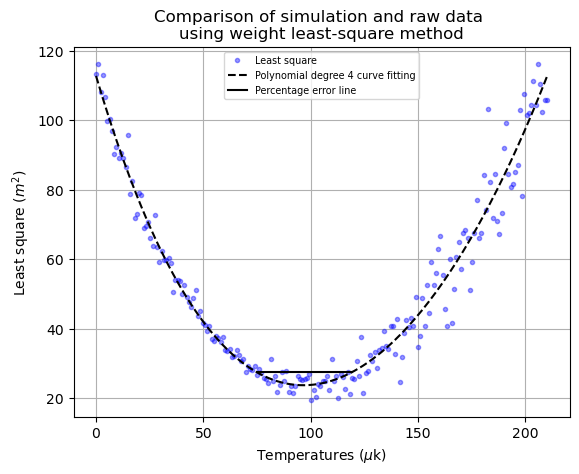

In [205]:
plt.figure()
plt.plot(temp_ranges_weight*1000000,lsq_data_weight,'.',label = 'Least square',alpha = 0.4, color ='blue')
plt.plot(temp_ranges_weight*1000000,lsq_fit_weight,'--',color = 'black',label = 'Polynomial degree 4 curve fitting')
plt.plot(temp_ranges_weight[temp_range_linear[0]]*1000000,err*np.ones(np.shape(temp_range_linear)[1]),color = 'black',label = 'Percentage error line')
plt.legend(loc = 'upper center',fontsize= 'x-small')
y_label = plt.ylabel(r'Least square ($m^2$)')
x_label = plt.xlabel('Temperatures ($\mu$k)')
plt.grid()
plt.title('Comparison of simulation and raw data \nusing weight least-square method')
plt.savefig('Comparison of simulation and raw data using weight least-square method')

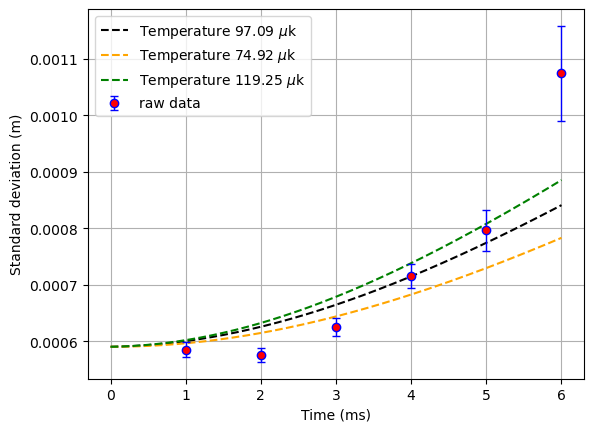

In [243]:
Temp_array = np.array([MOT_temp_min, MOT_temp_mean, MOT_temp_max],dtype = float)
Cloud_gen, times, time = Multi_MOT_gen(ini_MOT_size,200,Temp_array,sigma_exp)
plt.figure()
plt.plot(time*1000,Cloud_gen[1],'--k',label = 'Temperature '+str(np.round(Temp_array[1]*1000000,2))+' $\mu$k')
plt.plot(time*1000,Cloud_gen[0],'--',color= 'orange',label = 'Temperature '+str(np.round(Temp_array[0]*1000000,2))+' $\mu$k')
plt.plot(time*1000,Cloud_gen[2],'--',color= 'green',label = 'Temperature '+str(np.round(Temp_array[2]*1000000,2))+' $\mu$k')
plt.errorbar(np.arange(1,7) ,sigma_exp, sigma_err,color = 'blue',fmt ='o',label = 'raw data',capsize=3, elinewidth=1, mfc = 'red')
y_label = plt.ylabel('Standard deviation (m)')
x_label = plt.xlabel('Time (ms)')
plt.grid()
plt.legend()

<h2>LS + errorbar<h2>

In [207]:
def lsq_normal(n,temp_range_min,temp_range_max,sigma_raw_array):
    
    min_lsq = np.inf
    max_lsq = -np.inf
    lsq_list = []
    x_list = []
    y_list = []
    temp_range = np.linspace(temp_range_min,temp_range_max,n)
    n_of_time = len(sigma_exp)
    
    for i in range(n):
        sigma_sim = MOT_sim(ini_MOT_size,temp_range[i],n_of_time,sigma_exp)
        y_distance = (sigma_exp-sigma_sim)
        lsq = np.sum(y_distance**2)
        
        if(lsq < min_lsq):
            min_lsq = lsq
            real_temp = temp_range[i]

        if(lsq > max_lsq):
            max_lsq = lsq
        lsq_list.append(lsq)
    coef = np.polyfit(temp_range,lsq_list,4)
    poly1d = np.poly1d(coef)
    min_n = np.where(poly1d(temp_range) == np.min(poly1d(temp_range)))
    temp_minimum = temp_range[min_n][0]
    
    return lsq_list,temp_minimum, temp_range, poly1d(temp_range)

In [208]:
lsq_data, nMOT_temp, temp_ranges, nlsq_fit = lsq_normal(200,0e-6,390e-6,sigma_exp)
sigma_max, sigma_min = sigma_exp + sigma_err, sigma_exp - sigma_err
lsq_max, nMOT_temp_max, temp_ranges_max, lsq_fit_max = lsq_normal(200,0e-6,390e-6,sigma_max)
lsq_min, nMOT_temp_min, temp_ranges_min, lsq_fit_min = lsq_normal(200,0e-6,390e-6,sigma_min)

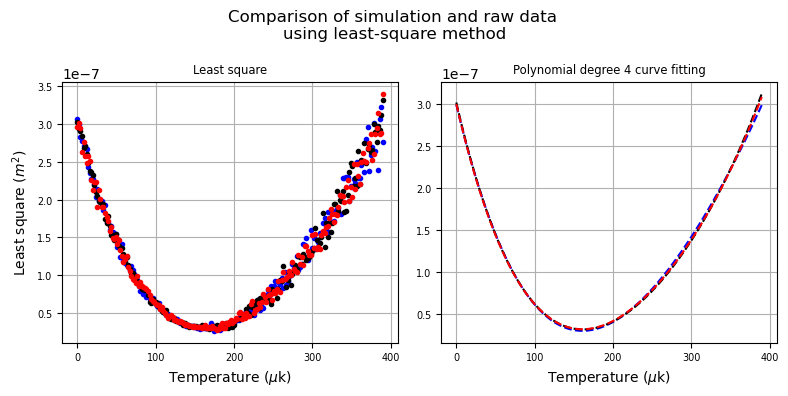

In [209]:
colormap_fig2 = 'afmhot'
fig = plt.figure(figsize=(8, 4))
axs = np.zeros(2, dtype=object)
gs = fig.add_gridspec(1, 2)
axs[0] = fig.add_subplot(gs[0, 0])
axs[1] = fig.add_subplot(gs[0, 1])

axs1 = axs[0].plot(temp_ranges*1000000,lsq_min,'.b')
axs1 = axs[0].plot(temp_ranges*1000000,lsq_data,'.k')
axs1 = axs[0].plot(temp_ranges*1000000,lsq_max,'.r')
axs[0].set_title('Least square',fontsize ='small')
axs[0].set_xlabel('Temperature ($\mu$k)')
axs[0].set_ylabel(r'Least square ($m^2$)')
axs[0].grid()
axs2 = axs[1].plot(temp_ranges*1000000,lsq_fit_min,'--b')
axs2 = axs[1].plot(temp_ranges*1000000,nlsq_fit,'--k')
axs2 = axs[1].plot(temp_ranges*1000000,lsq_fit_max,'--r')
axs[1].set_title('Polynomial degree 4 curve fitting',fontsize ='small')
axs[1].set_xlabel('Temperature ($\mu$k)')
axs[1].grid()

for x in axs.flat:
    for tick in x.xaxis.get_major_ticks():
        tick.label.set_fontsize('x-small')
    for tick in x.yaxis.get_major_ticks():
        tick.label.set_fontsize('x-small')
fig.suptitle('Comparison of simulation and raw data \nusing least-square method')
fig.tight_layout()
plt.savefig('Full subtract signal method at 1ms.png')

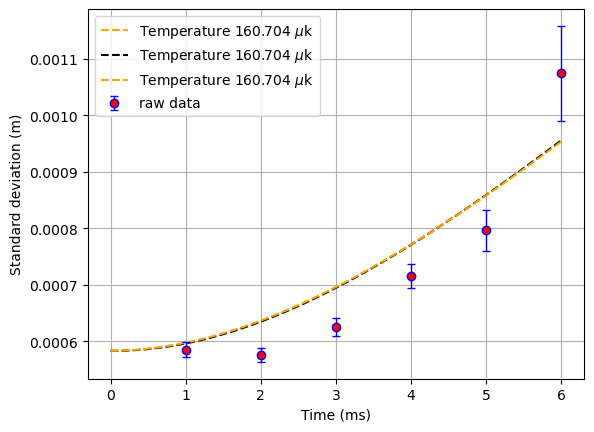

In [244]:
nTemp_array = np.array([nMOT_temp_min, nMOT_temp, nMOT_temp_max],dtype = float)
nCloud_gen, times, time = Multi_MOT_gen(ini_MOT_size,200,nTemp_array,sigma_exp)
plt.figure()
plt.plot(time*1000,nCloud_gen[0],'--',color= 'orange',label = 'Temperature '+str(np.round(nTemp_array[0]*1000000,3))+' $\mu$k')
plt.plot(time*1000,nCloud_gen[1],'--k',label = 'Temperature '+str(np.round(nTemp_array[1]*1000000,3))+' $\mu$k')
plt.plot(time*1000,nCloud_gen[2],'--',color= 'orange',label = 'Temperature '+str(np.round(nTemp_array[2]*1000000,3))+' $\mu$k')
plt.errorbar(np.arange(1,7) ,sigma_exp, sigma_err,color = 'blue',fmt ='o',label = 'raw data',capsize=3, elinewidth=1, mfc = 'red')
y_label = plt.ylabel('Standard deviation (m)')
x_label = plt.xlabel('Time (ms)')
plt.grid()
plt.legend()

<h1>2D fitting<h1>

In [211]:
def lsq_2params(n,temp_range_min,temp_range_max,m,size_min,size_max,sigma_raw_array,sigma_raw_err):
    
    min_lsq = np.inf
    max_lsq = -np.inf
    n_of_time = len(sigma_raw_array)
    temp_range = np.linspace(temp_range_min,temp_range_max,n)
    size_range = np.linspace(size_min,size_max,m)
    twoD_lsq = []
    for j in range(m):
        x_list = []
        y_list = []    
        lsq_list = []
        for i in range(n):
            
            sigma_sim = MOT_sim(size_range[j],temp_range[i],n_of_time,sigma_raw_array)
            y_distance_weight = [((1/(sigma_raw_err[h]**2))*((sigma_raw_array[h]-sigma_sim[h])**2)) for h in range(n_of_time)]
            lsq = np.sum(y_distance_weight)

            if(lsq < min_lsq):
                min_lsq = lsq
                real_temp = temp_range[i]
                real_size = size_range[j]
            if(lsq > max_lsq):
                max_lsq = lsq
            lsq_list.append(lsq)
        coef = np.polyfit(temp_range,lsq_list,4)
        poly1d = np.poly1d(coef)
        twoD_lsq.append(poly1d(temp_range))
    return np.array(twoD_lsq), real_temp , real_size

In [212]:
temp_min,temp_max,size_min,size_max = 0,400,0.4,0.7 
lsq_data, MOT_temp_2params, MOT_size = lsq_2params(30,temp_min*1e-6,temp_max*1e-6,30,size_min*1e-3,size_max*1e-3,sigma_exp,sigma_err)

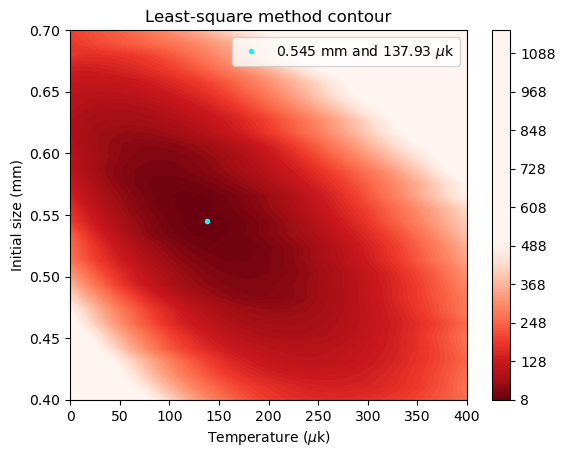

In [213]:
plt.contourf(lsq_data,150,cmap = 'Reds_r',extent = (temp_min,temp_max,size_min,size_max),vmax =500)
plt.plot(MOT_temp_2params*1000000,MOT_size*1000,'.',color = 'cyan',label = str(np.round(MOT_size*1000,3))+' mm and '+str(np.round(MOT_temp_2params*1000000,2))+' $\mu$k ')
plt.colorbar()
plt.xlabel('Temperature ($\mu$k)')
plt.ylabel('Initial size (mm)')
plt.title('Least-square method contour')
plt.legend()

<Figure size 640x480 with 0 Axes>

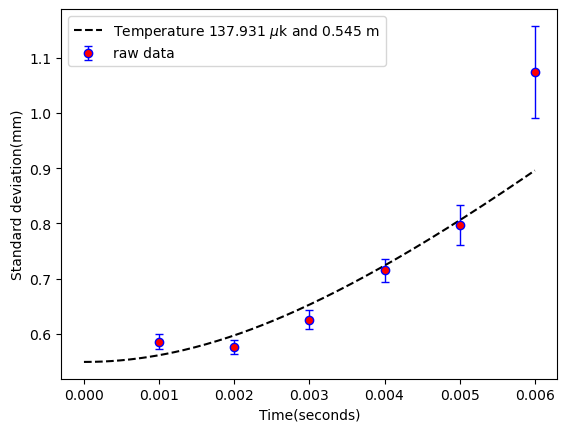

<Figure size 640x480 with 0 Axes>

In [245]:
MOT_2params_sim, times, time = MOT_gen (MOT_size,200,MOT_temp_2params,sigma_exp)
plt.errorbar(times+0.001 ,sigma_exp*1000, sigma_err*1000,color = 'blue',fmt ='o',label = 'raw data',capsize=3, elinewidth=1, mfc = 'red')
plt.plot(time,MOT_2params_sim*1000,'--k',label = 'Temperature '+str(np.round(MOT_temp_2params*1000000,3))+' $\mu$k and '+str(np.round(MOT_size*1000,3))+' m')
plt.legend()
y_label = plt.ylabel('Standard deviation(mm)')
x_label = plt.xlabel('Time(seconds)')
plt.figure()